In [3]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [5]:
to = pd.read_csv('flight.csv')

In [6]:
to.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind Direction,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [7]:
#Standardise. 
to.columns = to.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              28820 non-null  int64  
 1   day_of_month       28820 non-null  int64  
 2   day_of_week        28820 non-null  int64  
 3   op_unique_carrier  28820 non-null  object 
 4   tail_num           28820 non-null  object 
 5   dest               28820 non-null  object 
 6   dep_delay          28820 non-null  int64  
 7   crs_elapsed_time   28820 non-null  int64  
 8   distance           28820 non-null  int64  
 9   crs_dep_m          28820 non-null  int64  
 10  dep_time_m         28820 non-null  int64  
 11  crs_arr_m          28820 non-null  int64  
 12  temperature        28820 non-null  int64  
 13  dew_point          28820 non-null  object 
 14  humidity           28820 non-null  int64  
 15  wind_direction     28818 non-null  object 
 16  wind_speed         288

In [9]:
# check missing values 
to.isnull().sum()

month                0
day_of_month         0
day_of_week          0
op_unique_carrier    0
tail_num             0
dest                 0
dep_delay            0
crs_elapsed_time     0
distance             0
crs_dep_m            0
dep_time_m           0
crs_arr_m            0
temperature          0
dew_point            0
humidity             0
wind_direction       2
wind_speed           0
wind_gust            0
pressure             0
condition            0
sch_dep              0
sch_arr              0
taxi_out             0
dtype: int64

In [10]:
# Identify numerical columns
numerical_cols = to.select_dtypes(include=['float64', 'int64']).columns

# Fill missing numerical values with median
for col in numerical_cols:
    to[col] = to[col].fillna(to[col].median())

# Identify categorical columns
categorical_cols = to.select_dtypes(include=['object']).columns

# Drop rows where any categorical column is missing
to.dropna(subset=categorical_cols, inplace=True)

# Check if there are any missing values left
print(to.isnull().sum())

month                0
day_of_month         0
day_of_week          0
op_unique_carrier    0
tail_num             0
dest                 0
dep_delay            0
crs_elapsed_time     0
distance             0
crs_dep_m            0
dep_time_m           0
crs_arr_m            0
temperature          0
dew_point            0
humidity             0
wind_direction       0
wind_speed           0
wind_gust            0
pressure             0
condition            0
sch_dep              0
sch_arr              0
taxi_out             0
dtype: int64


In [11]:
print(to.dtypes)

month                  int64
day_of_month           int64
day_of_week            int64
op_unique_carrier     object
tail_num              object
dest                  object
dep_delay              int64
crs_elapsed_time       int64
distance               int64
crs_dep_m              int64
dep_time_m             int64
crs_arr_m              int64
temperature            int64
dew_point             object
humidity               int64
wind_direction        object
wind_speed             int64
wind_gust              int64
pressure             float64
condition             object
sch_dep                int64
sch_arr                int64
taxi_out               int64
dtype: object


In [20]:
# drop tail number column - not useful
to = to.drop(columns=['tail_num'])

In [53]:
# Convert categorical variables to one-hot encoded variables
categorical_vars = [ 'op_unique_carrier','dest','condition', 'wind_direction']  # Example list of categorical variables
t1 = pd.get_dummies(to, columns=categorical_vars)

In [54]:
print(t1.dtypes)

month                 int64
day_of_month          int64
day_of_week           int64
dep_delay             int64
crs_elapsed_time      int64
                      ...  
wind_direction_SW      bool
wind_direction_VAR     bool
wind_direction_W       bool
wind_direction_WNW     bool
wind_direction_WSW     bool
Length: 135, dtype: object


In [55]:
# convert  numeric columns from object to numeric

# Assuming 'to' is your DataFrame
columns_to_convert = ['dew_point']

# Convert specified columns to numeric
for column in columns_to_convert:
    to[column] = pd.to_numeric(to[column], errors='coerce')

# Get summary statistics for all numeric columns
to.describe()

,month,day_of_month,day_of_week,dep_delay,crs_elapsed_time,distance,crs_dep_m,dep_time_m,crs_arr_m,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,sch_dep,sch_arr,taxi_out
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,27093.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,31.973646,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,10.984051,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,24.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,32.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [56]:

# Print new column names for each original categorical variable to ensure they are now present
for cat_var in categorical_vars:
    encoded_columns = [col for col in t1.columns if cat_var in col]
    print(f"Encoded columns for {cat_var}: {encoded_columns}")


Encoded columns for op_unique_carrier: ['op_unique_carrier_9E', 'op_unique_carrier_AA', 'op_unique_carrier_AS', 'op_unique_carrier_B6', 'op_unique_carrier_DL', 'op_unique_carrier_HA', 'op_unique_carrier_MQ', 'op_unique_carrier_OO', 'op_unique_carrier_YX']
Encoded columns for dest: ['dest_ABQ', 'dest_ATL', 'dest_AUS', 'dest_BNA', 'dest_BOS', 'dest_BQN', 'dest_BTV', 'dest_BUF', 'dest_BUR', 'dest_BWI', 'dest_CHS', 'dest_CLE', 'dest_CLT', 'dest_CMH', 'dest_CVG', 'dest_DCA', 'dest_DEN', 'dest_DFW', 'dest_DTW', 'dest_EGE', 'dest_FLL', 'dest_HNL', 'dest_IAD', 'dest_IAH', 'dest_IND', 'dest_JAC', 'dest_JAX', 'dest_LAS', 'dest_LAX', 'dest_LGB', 'dest_MCO', 'dest_MIA', 'dest_MSP', 'dest_MSY', 'dest_OAK', 'dest_ONT', 'dest_ORD', 'dest_ORF', 'dest_ORH', 'dest_PBI', 'dest_PDX', 'dest_PHL', 'dest_PHX', 'dest_PIT', 'dest_PSE', 'dest_PSP', 'dest_PWM', 'dest_RDU', 'dest_RIC', 'dest_RNO', 'dest_ROC', 'dest_RSW', 'dest_SAN', 'dest_SAT', 'dest_SAV', 'dest_SEA', 'dest_SFO', 'dest_SJC', 'dest_SJU', 'dest_SLC

In [61]:
# Check and print data types of the one-hot encoded columns
for cat_var in categorical_vars:
    encoded_columns = [col for col in t1.columns if cat_var in col]
    print(f"Data types for encoded columns from {cat_var}:")
    print(t1[encoded_columns].dtypes)


Data types for encoded columns from op_unique_carrier:
op_unique_carrier_9E    bool
op_unique_carrier_AA    bool
op_unique_carrier_AS    bool
op_unique_carrier_B6    bool
op_unique_carrier_DL    bool
op_unique_carrier_HA    bool
op_unique_carrier_MQ    bool
op_unique_carrier_OO    bool
op_unique_carrier_YX    bool
dtype: object
Data types for encoded columns from dest:
dest_ABQ    bool
dest_ATL    bool
dest_AUS    bool
dest_BNA    bool
dest_BOS    bool
            ... 
dest_SMF    bool
dest_SRQ    bool
dest_STT    bool
dest_SYR    bool
dest_TPA    bool
Length: 65, dtype: object
Data types for encoded columns from condition:
condition_Cloudy                   bool
condition_Cloudy / Windy           bool
condition_Drizzle and Fog          bool
condition_Fair                     bool
condition_Fair / Windy             bool
condition_Fog                      bool
condition_Fog / Windy              bool
condition_Heavy Rain               bool
condition_Heavy Rain / Windy       bool
conditio

In [26]:
t1.describe()

,month,day_of_month,day_of_week,dep_delay,crs_elapsed_time,distance,crs_dep_m,dep_time_m,crs_arr_m,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,sch_dep,sch_arr,taxi_out
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,27093.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,31.973646,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,10.984051,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,24.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,32.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


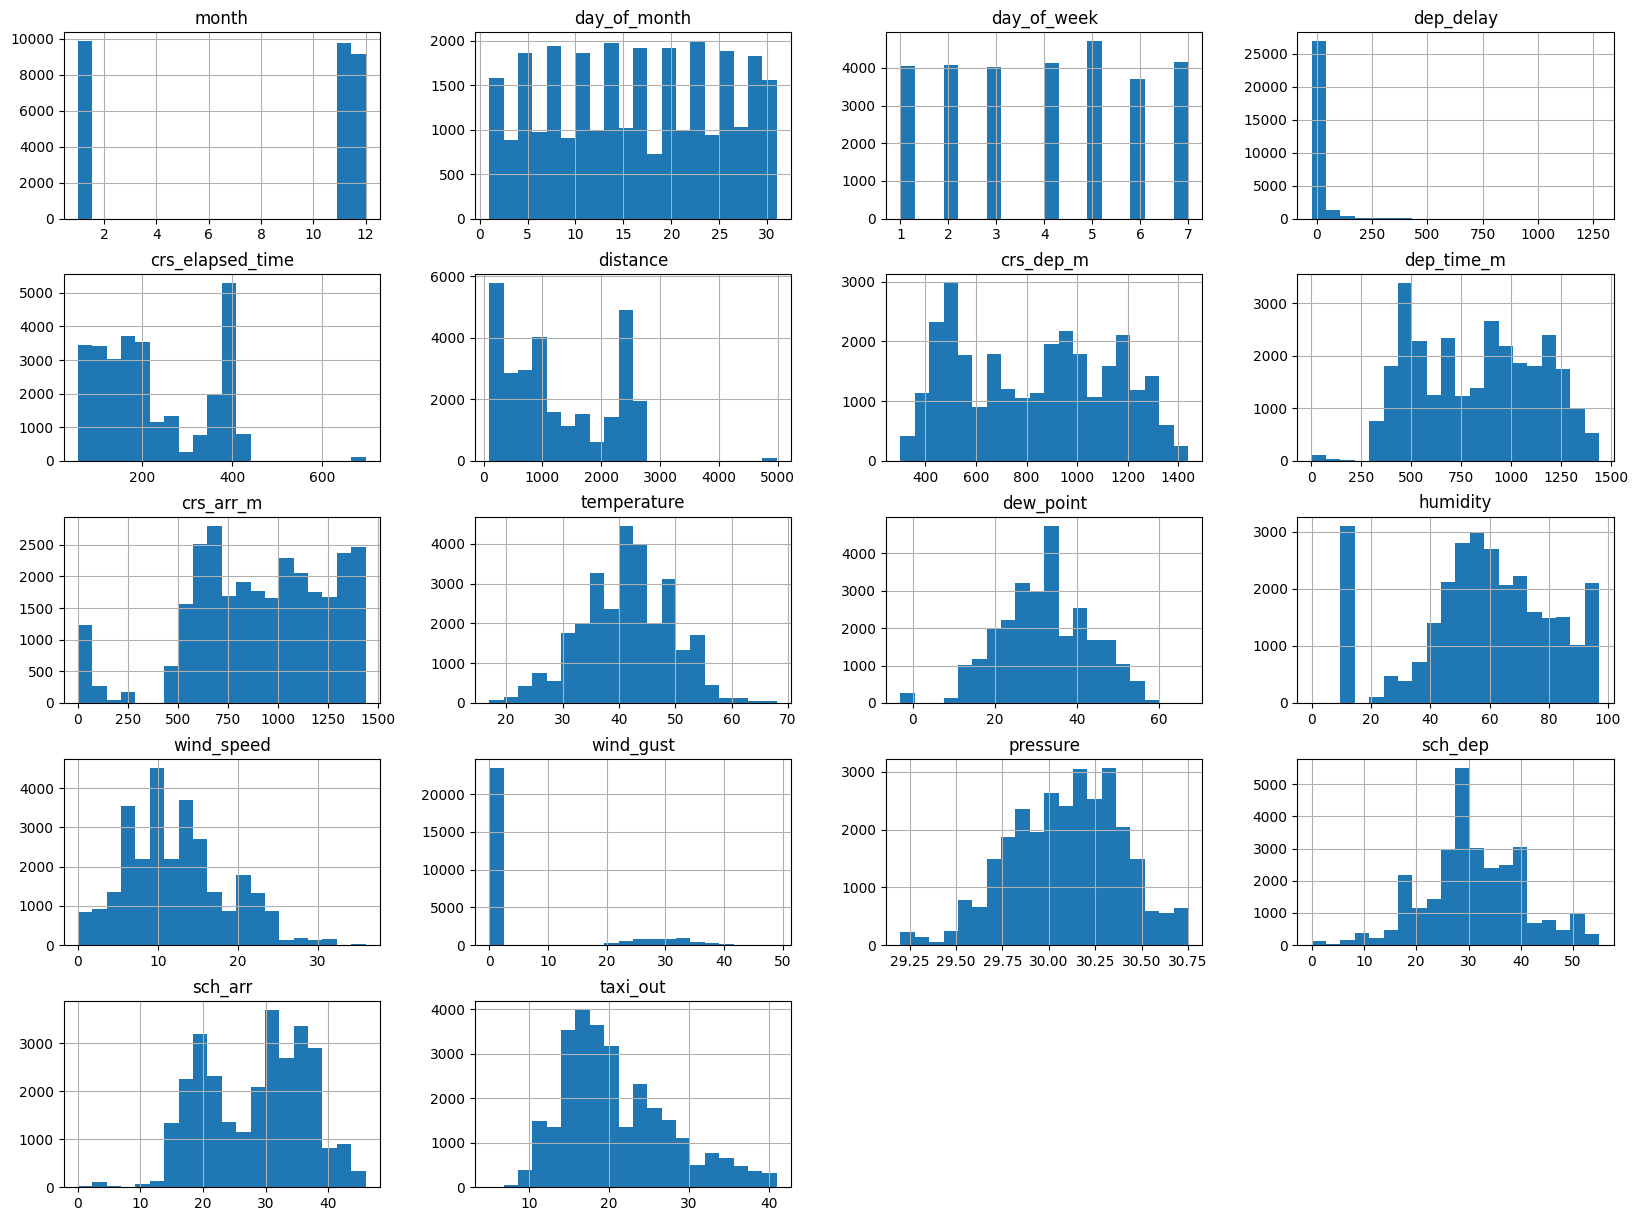

In [30]:
to.hist (bins=20, figsize=(20,15))
plt.show()

Text(0, 0.5, 'Frequency')

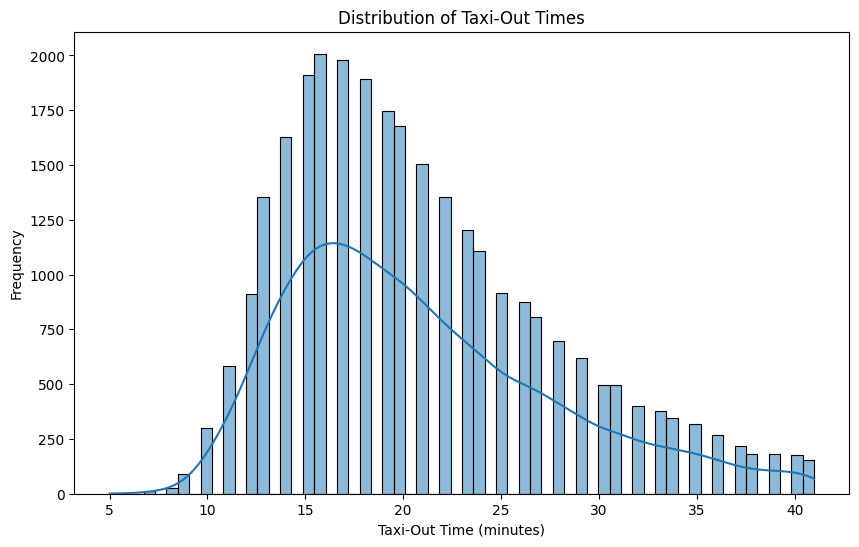

In [28]:
# Distribution of taxi_out
plt.figure(figsize=(10, 6))
sns.histplot(t1['taxi_out'], kde=True)
plt.title('Distribution of Taxi-Out Times')
plt.xlabel('Taxi-Out Time (minutes)')
plt.ylabel('Frequency')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0, 0.5, 'Taxi-Out Time (minutes)')

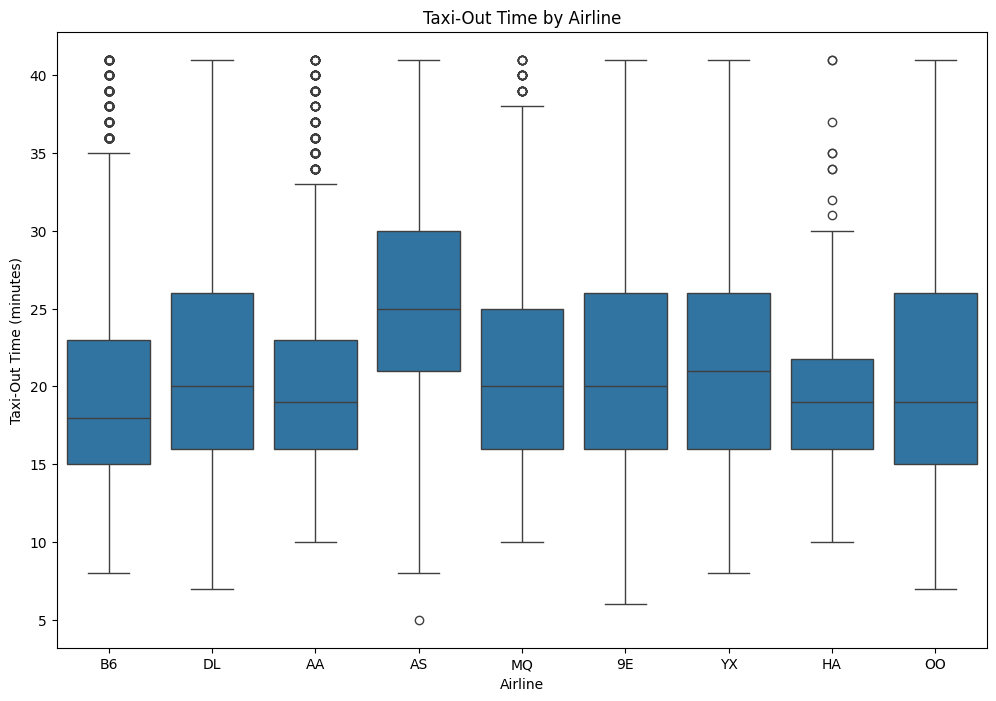

In [29]:
# Box Plot for a taxi out vs. airlne 
plt.figure(figsize=(12, 8))
sns.boxplot(x='op_unique_carrier', y='taxi_out', data=to)
plt.title('Taxi-Out Time by Airline')
plt.xlabel('Airline')
plt.ylabel('Taxi-Out Time (minutes)')

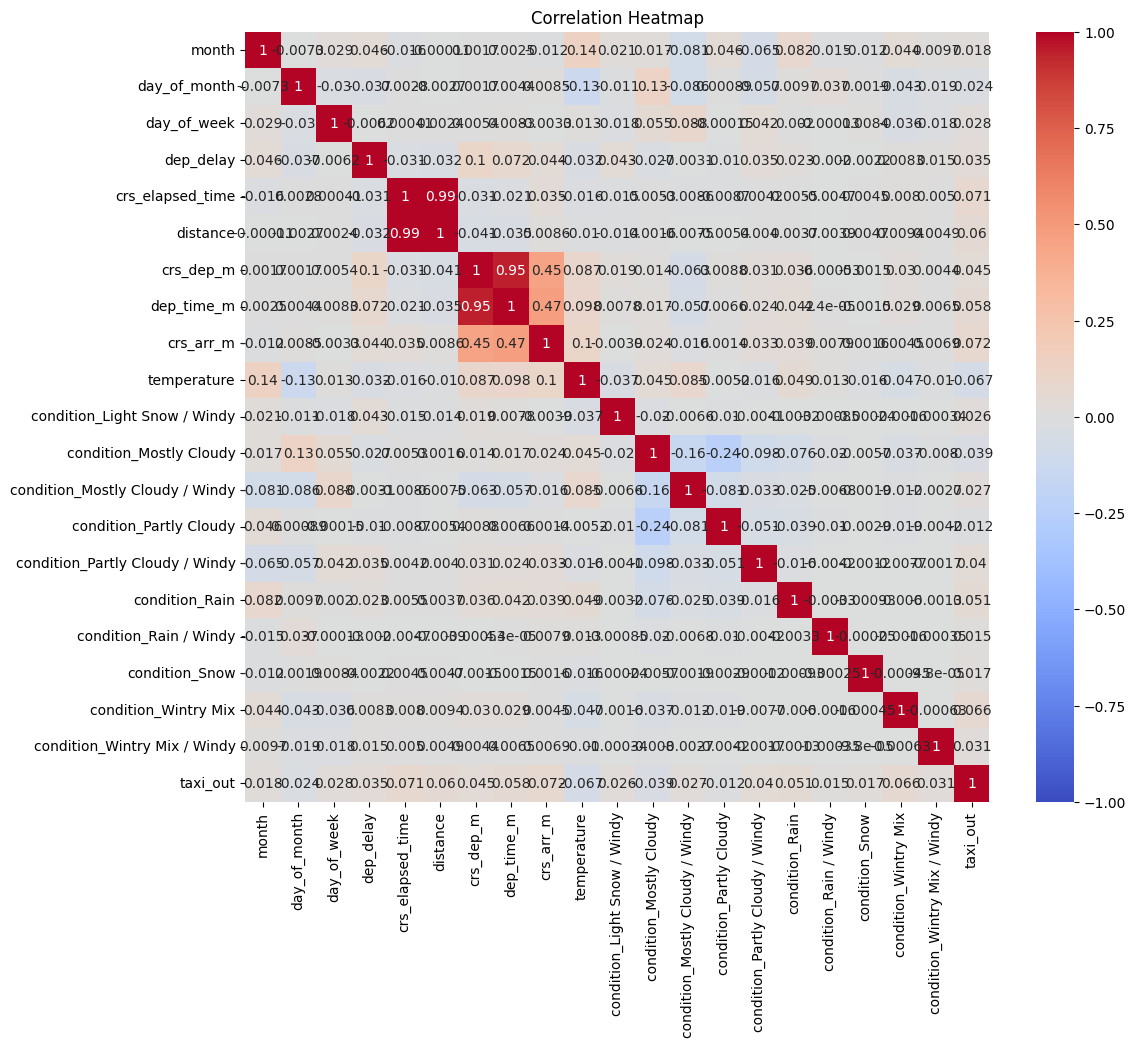

In [42]:
# Select vraibels  for correlation analysis

v1= ['month','day_of_month','day_of_week','dep_delay','crs_elapsed_time','distance','crs_dep_m','dep_time_m','crs_arr_m','temperature','condition_Light Snow / Windy', 'condition_Mostly Cloudy', 'condition_Mostly Cloudy / Windy', 'condition_Partly Cloudy', 'condition_Partly Cloudy / Windy', 'condition_Rain', 'condition_Rain / Windy', 'condition_Snow', 'condition_Wintry Mix', 'condition_Wintry Mix / Windy', 'taxi_out']

# Calculate the correlation matrix
correlation_matrix = t1[v1].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

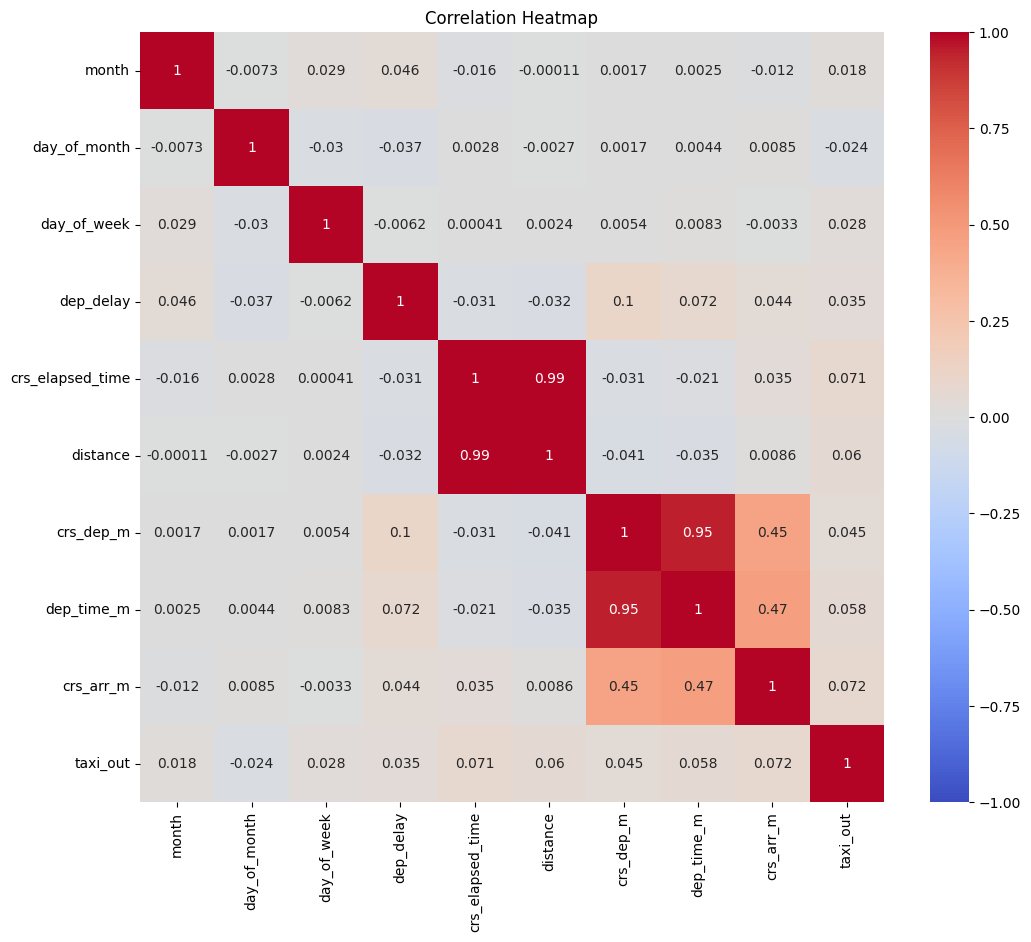

In [43]:
# Select numerical attributes for correlation analysis
v2= ['month','day_of_month','day_of_week','dep_delay','crs_elapsed_time','distance','crs_dep_m','dep_time_m','crs_arr_m', 'taxi_out']

# Calculate the correlation matrix
correlation_matrix = t1[v2].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

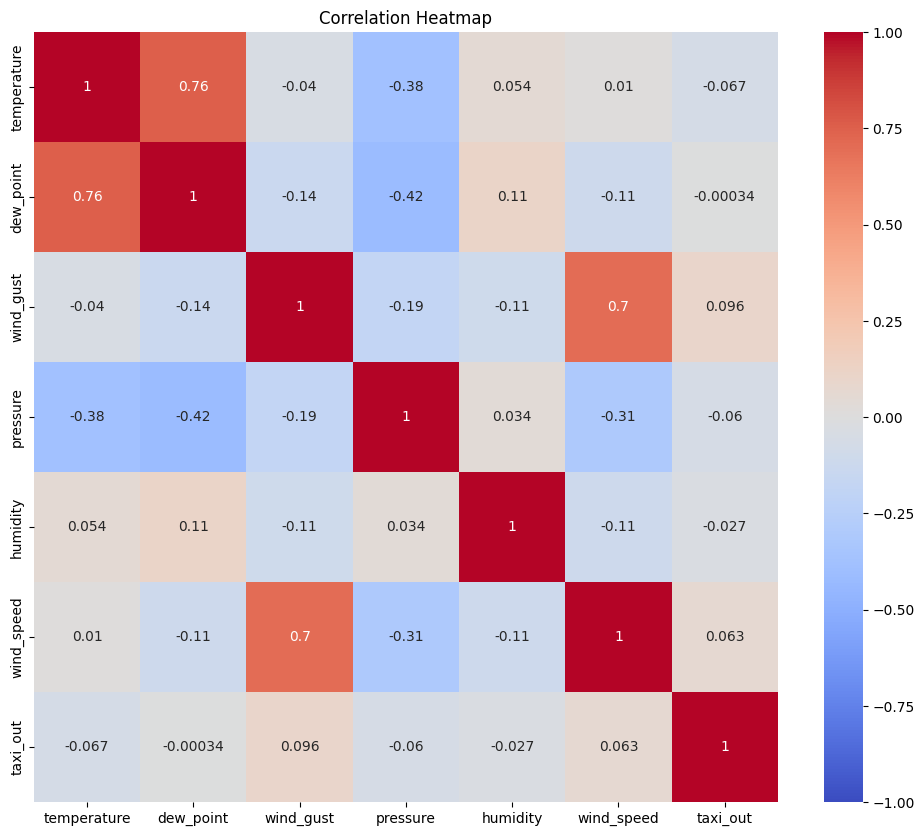

In [45]:
# Select numerical attributes for correlation analysis
v3= ['temperature','dew_point','wind_gust', 'pressure', 'humidity', 'wind_speed', 'taxi_out']

# Calculate the correlation matrix
correlation_matrix = t1[v3].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

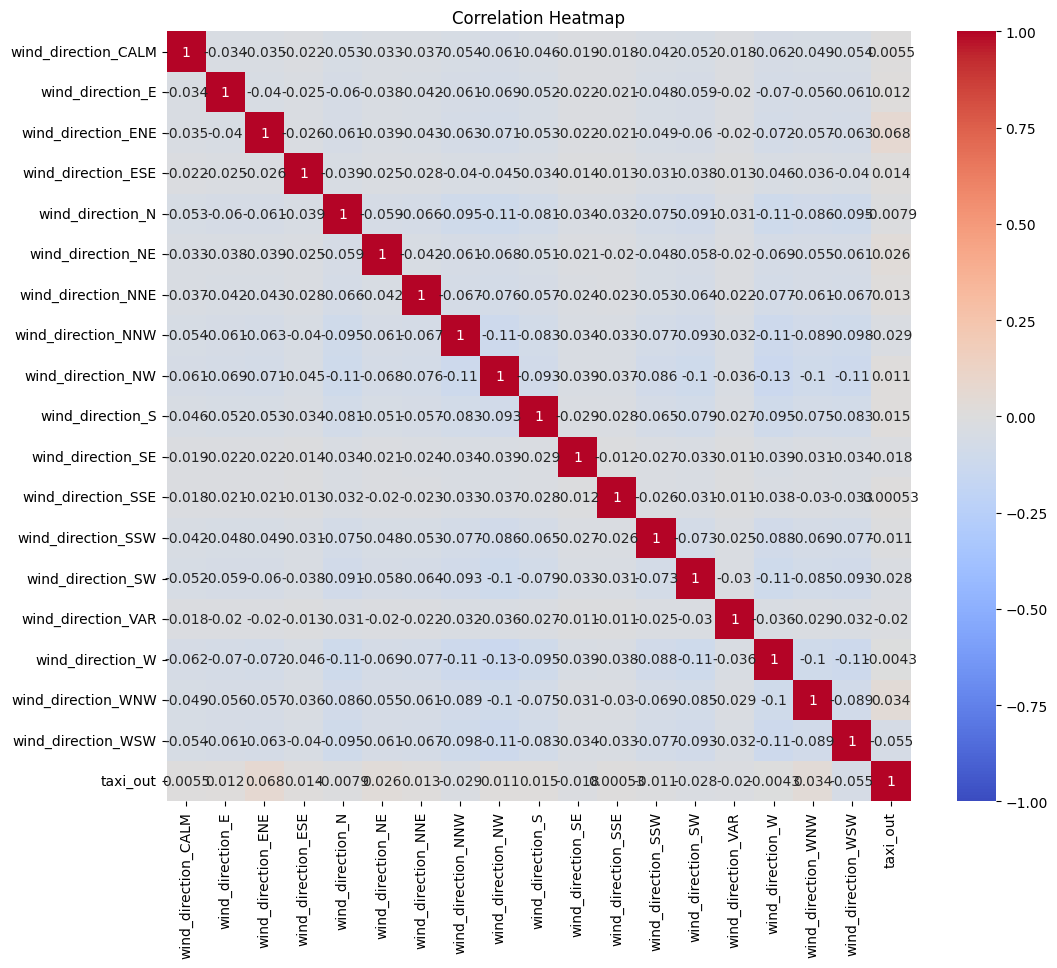

In [64]:
# Select numerical attributes for correlation analysis
v3= ['wind_direction_CALM',
'wind_direction_E',
'wind_direction_ENE', 
'wind_direction_ESE',
'wind_direction_N',
'wind_direction_NE',
'wind_direction_NNE',
'wind_direction_NNW',
'wind_direction_NW',
'wind_direction_S',
'wind_direction_SE',
'wind_direction_SSE',
'wind_direction_SSW',
'wind_direction_SW',
'wind_direction_VAR',
'wind_direction_W',
'wind_direction_WNW',
'wind_direction_WSW',
'taxi_out']

# Calculate the correlation matrix
correlation_matrix = t1[v3].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

In [78]:
# inital linear regression modeel displayed ValueError: Input X contains NaN.
## normailsie data ensuirng missing values are replaced with mean and rows missing categorical data are dropped 

from sklearn.impute import SimpleImputer

#  Drop rows where any categorical column is missing
categorical_cols = t1.select_dtypes(include=['object']).columns
t1.dropna(subset=categorical_cols, inplace=True)

# Identify numerical columns for imputation
numerical_cols = t1.select_dtypes(include=[np.number]).columns

# Apply imputation to numerical columns only
imputer = SimpleImputer(strategy='mean')
t1[numerical_cols] = imputer.fit_transform(t1[numerical_cols])

# Confirm no missing values remain
if not t1.isnull().values.any():
    print("No missing values remain.") 

No missing values remain.


In [77]:
# Linear regression model 

# Define featueres 
X = t1.drop('taxi_out', axis=1)  # Features
y = t1['taxi_out']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

## FEATURE SCALING
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

In [79]:
## CREATE A DATAFRAME THAT WILL SHOW THE ACTUAL CLOSING STOCK PRICE AND THE PREDICTED STOCK PRICE
pred = pd.DataFrame({'Actual TO': y_test, 'Predicted TO': y_pred})
pred

,Actual TO,Predicted TO
9360,21.0,18.780486
20390,19.0,21.244354
16151,17.0,19.399627
26927,19.0,18.358611
2007,20.0,16.738494
...,...,...
376,16.0,18.480682
10920,31.0,25.079314
13605,15.0,25.565643
2829,19.0,20.621551


In [80]:
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(model.score(X_test, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)

R squared:0.13
Mean Absolute Error: 5.0369222950918875
Mean Square Error: 40.67054685702474
Root Mean Square Error: 6.377346380511626


In [81]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [82]:
# LASSSO REGRESSION 

# define lasso model with alpha=0.1
model_lasso = Lasso(alpha =0.01)

In [84]:

X = t1.drop('taxi_out', axis=1)  # Features
y = t1['taxi_out']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Scale your features (if you haven't done so already during preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Lasso model
model_lasso = Lasso(alpha=1.0, random_state=32)  # Adjust alpha as needed
model_lasso.fit(X_train_scaled, y_train)

# Making predictions
pred_lasso = model_lasso.predict(X_test_scaled)  # Using X_test_scaled if scaling was applied

In [85]:
lasso_df = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': pred_lasso})
lasso_df

,Actual_Score,Predicted_Score
9360,21.0,21.022107
20390,19.0,20.860956
16151,17.0,20.989877
26927,19.0,20.474193
2007,20.0,20.828726
...,...,...
376,16.0,21.022107
10920,31.0,20.828726
13605,15.0,20.893186
2829,19.0,21.151028


In [86]:
# Calculate error metrics
meanAbError = metrics.mean_absolute_error(y_test, pred_lasso)
meanSqError = metrics.mean_squared_error(y_test, pred_lasso)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, pred_lasso))

# Print performance metrics
print('R squared:{:.2f}'.format(model_lasso.score(X_test_scaled, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)


R squared:0.01
Mean Absolute Error: 5.455102849071256
Mean Square Error: 46.0842751819779
Root Mean Square Error: 6.788539988979803


In [87]:
# RIDGE REGRESSION

# define ridge model with alpha=0.1
model_ridge = Ridge(alpha =0.01)

X = t1.drop('taxi_out', axis=1)  # Features
y = t1['taxi_out']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Scale your features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Lasso model
model_ridge = Lasso(alpha=1.0, random_state=32)  # Adjust alpha as needed
model_ridge.fit(X_train_scaled, y_train)

# Making predictions
pred_ridge = model_ridge.predict(X_test_scaled)  # Using X_test_scaled if scaling was applied

In [89]:
# print actual and predicted values for  ridge 
ridge_df = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': pred_ridge})
ridge_df

,Actual_Score,Predicted_Score
9360,21.0,21.022107
20390,19.0,20.860956
16151,17.0,20.989877
26927,19.0,20.474193
2007,20.0,20.828726
...,...,...
376,16.0,21.022107
10920,31.0,20.828726
13605,15.0,20.893186
2829,19.0,21.151028


In [90]:
# Calculate error metrics
meanAbError = metrics.mean_absolute_error(y_test, pred_ridge)
meanSqError = metrics.mean_squared_error(y_test, pred_ridge)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, pred_ridge))

# Print performance metrics
print('R squared:{:.2f}'.format(model_ridge .score(X_test_scaled, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)


R squared:0.01
Mean Absolute Error: 5.455102849071256
Mean Square Error: 46.0842751819779
Root Mean Square Error: 6.788539988979803
